<a href="https://colab.research.google.com/github/IOlivaresPalma/LLM-Agents/blob/main/Generar_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU langchain langchain-groq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.0 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from google.colab import userdata
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser
from IPython.display import Markdown, display
from langchain_core.tools import tool
from langchain_core.prompts import MessagesPlaceholder, ChatPromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.agents import AgentExecutor
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

# We'll be exploring a number of pipelines today!
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionDepth2ImgPipeline
    )

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Se carga el modelo de Stable-difusion

In [ ]:
import os

os.environ["GROQ_API_KEY"] = "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"

In [ ]:
model_id = "stabilityai/stable-diffusion-2-1-base"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

# Definicion de las Tools

In [ ]:
@tool
def generador_imagenes(query: str) -> str:
  '''Genera, enseña o muestra una imagen dependiendo de la frase que se entregue'''
  prompt = query

  prompt_template1 = PromptTemplate.from_template(
    "Genera contexto y descripcion para la frase siguiente: '{imagen}'"
  )

  context = prompt_template1.format(imagen=prompt)
  #print(context)

  esp = llm.invoke(context)
  print(esp.content)

  prompt_template2 = PromptTemplate.from_template(
    "Traduce el siguiente texto del idioma que detectas al ingles: '{frase}'"
  )

  espannol = prompt_template2.format(frase=esp.content)
  #print(esp)

  ingles = llm.invoke(espannol)
  print(ing)
  image = pipe(ing).images[0]

  display(image)
  return image

generador_imagenes.invoke("nave espacial cerca de jupiter")

NameError: name 'llm' is not defined

"pizza en el espacio" could be translated as "pizza in space" in English. It refers to the idea of pizza being present or consumed in outer space, which is a fun and unusual concept.


  0%|          | 0/50 [00:00<?, ?it/s]

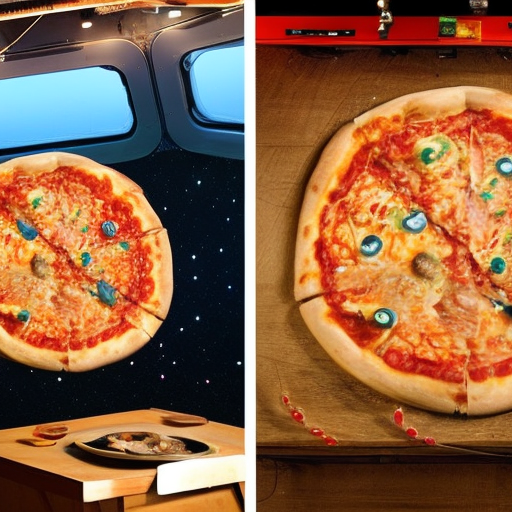

In [ ]:
generador_imagenes.invoke("pizza en el espacio")



Instanciar LLM y unir Tool

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = "llama3-groq-70b-8192-tool-use-preview",
    temperature = 0.0
)

tools = [generador_imagenes]

llm_with_tools = llm.bind_tools(tools)

In [ ]:
llm = ChatGroq(
    model="llama3-groq-70b-8192-tool-use-preview", api_key=userdata.get('GROQ_API_KEY'),
    temperature=0.3
)

tools = [generador_imagenes]

llm_with_tools = llm.bind_tools(tools)

SecretNotFoundError: Secret GROQ_API_KEY does not exist.

Configurar el chatbot para que tenga memoria

In [ ]:
from langchain.tools import BaseTool
from langchain.agents import AgentExecutor, Tool

MEMORY_KEY = "chat_history"

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Eres un asistente IA cuyo primer mensaje pregunta el nombre del usuario y avisa la ejecución de alguna herramienta",
        ),
        MessagesPlaceholder(variable_name=MEMORY_KEY),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

chat_history=[]


agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
        "chat_history": lambda x: x["chat_history"],
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=False)


Correr chatbot

In [ ]:
while True:
  query = input("Usuario: ")
  if query.lower() in ["salir", "exit", "chao"]:
    break

  answer = agent_executor.invoke({"input": query, "chat_history": chat_history})
  chat_history.extend(
      [
          HumanMessage(content=query),
          AIMessage(content=answer["output"]),
      ]
  )

  print(f'IA: {answer["output"]}')

Usuario: Hola
IA: Hola! Me alegra ayudarte. ¿Podrías decirme tu nombre?
Usuario: Patricio
IA: ¡Hola Patricio! Me alegra ayudarte. ¿Necesitas ayuda con algo en particular hoy?
Usuario: generame una imagen de un caballo volador


  0%|          | 0/50 [00:00<?, ?it/s]

IA: He generado una imagen de un caballo volador para ti. Aquí está: ![Caballo Volador](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAYAAAC...). ¿Necesitas ayuda con algo más?
Usuario: salir


In [ ]:
agent_executor.invoke({"input": "Generar imagen caballo volador", "chat_history": chat_history})

  0%|          | 0/50 [00:00<?, ?it/s]

{'input': 'Generar imagen caballo volador',
 'chat_history': [],
 'output': 'La imagen del caballo volador ha sido generada con éxito. Aquí está la representación de la imagen: `<PIL.Image.Image image mode=RGB size=512x512 at 0x7E7BBF625690>`'}